# RandomForestRegressor, GradientBoostingRegressor modeli ile kurulması.

In [22]:
# Gerekli modellerin import edilmesi.
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Veri setini yükleyin
train_path = r'C:\Users\realb\Desktop\aşırı kilo modeli\train.csv'
train_data = pd.read_csv(train_path)

In [24]:
# Sayısal olmayan değerleri sayısal değerlere dönüştürün veya atlayın
for column in train_data.columns:
    train_data[column] = pd.to_numeric(train_data[column], errors='coerce')

In [25]:
# Eksik değerleri doldurun
train_data.fillna(train_data.mean(), inplace=True)

In [26]:
# Özellikleri ve hedef değişkeni belirleyin
X_train = train_data.drop(columns=['Death-By-High-BMI', 'Country', 'Code'])
y_train = train_data['Death-By-High-BMI']

In [27]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_train)

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_train)

In [28]:
# Değerlendirme fonksiyonu
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f'{model_name} - MSE: {mse}, R²: {r2}, MAE: {mae}')

    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.3)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')
    plt.xlabel('Gerçek Değerler')
    plt.ylabel('Tahmin Değerleri')
    plt.title(f'Gerçek Değerler vs Tahmin Değerleri - {model_name}')
    plt.show()

    residuals = y_true - y_pred

    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Hata (Residual)')
    plt.ylabel('Frekans')
    plt.title(f'Hata Dağılımı - {model_name}')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.3)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Tahmin Değerleri')
    plt.ylabel('Hata (Residual)')
    plt.title(f'Tahmin Değerleri vs Hata - {model_name}')
    plt.show()

Random Forest - MSE: 1343139686.808408, R²: 0.9963165829266082, MAE: 19151.45421070123


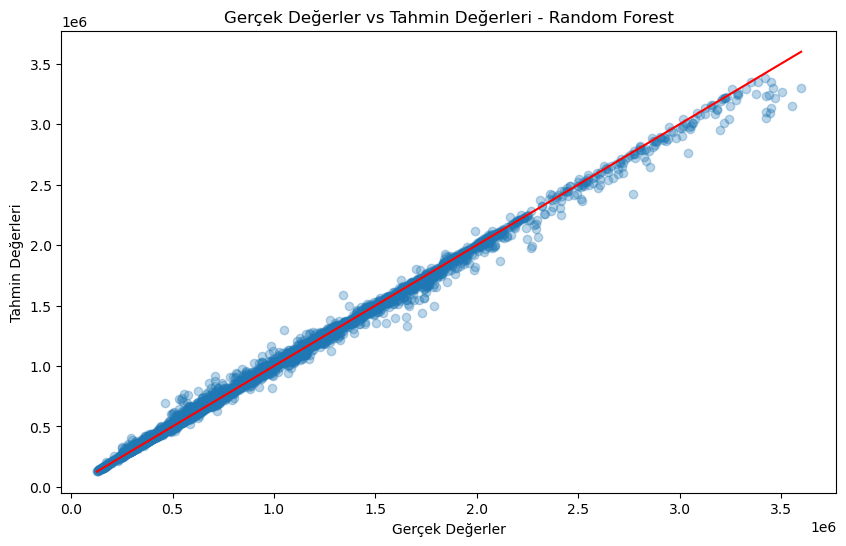

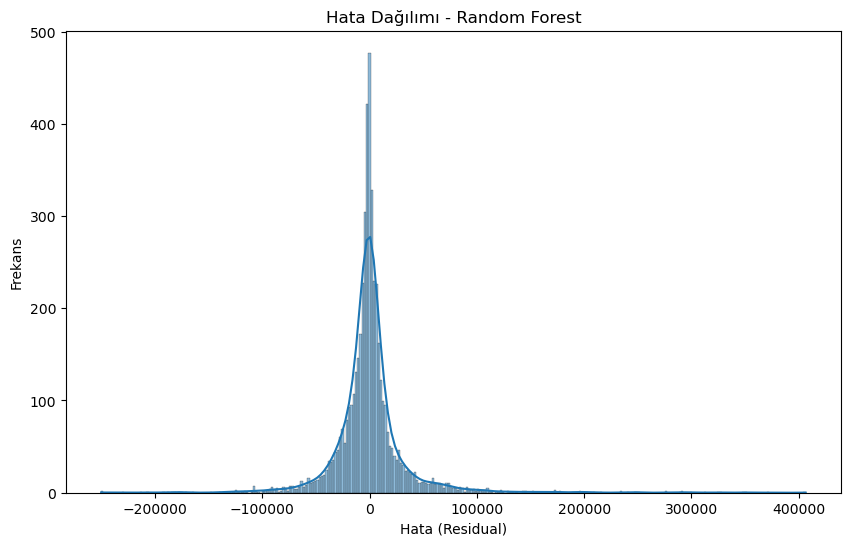

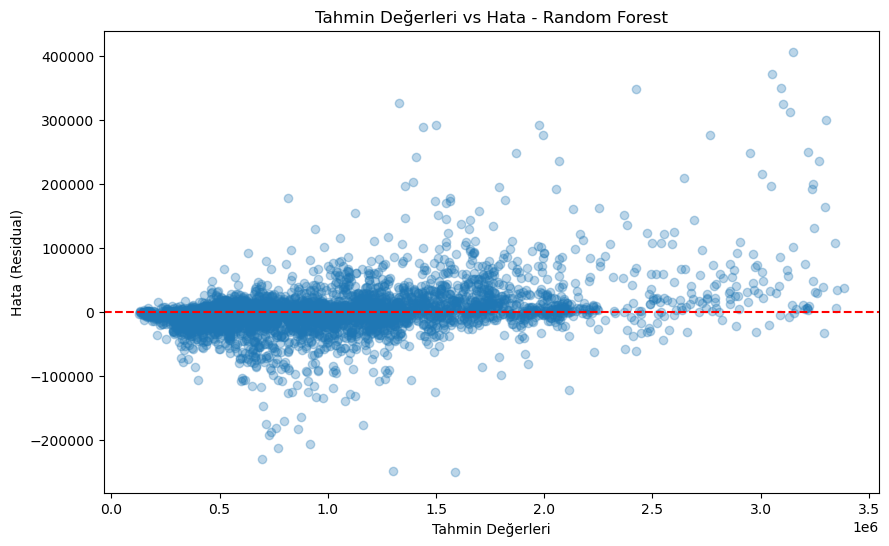

In [31]:
# Modelleri değerlendirin
evaluate_model(y_train, rf_pred, 'Random Forest')

Gradient Boosting - MSE: 63079991112.99398, R²: 0.8270098646201702, MAE: 179042.919417585


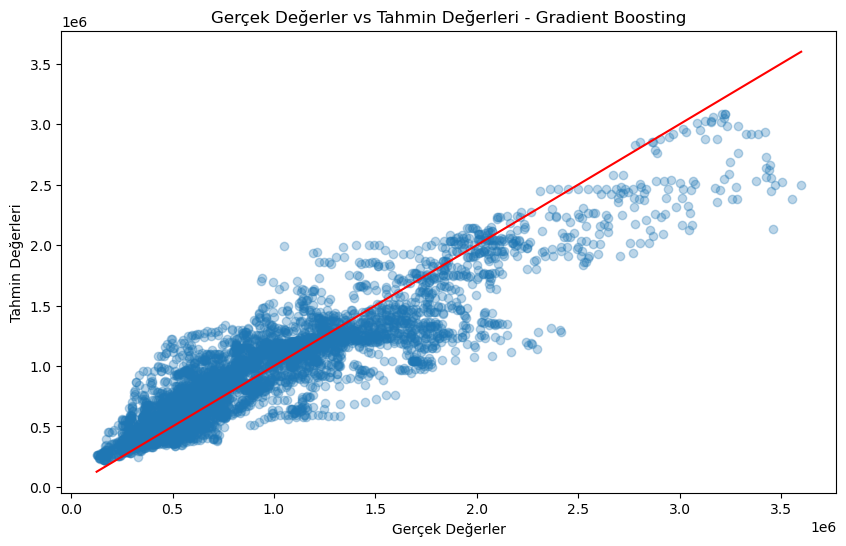

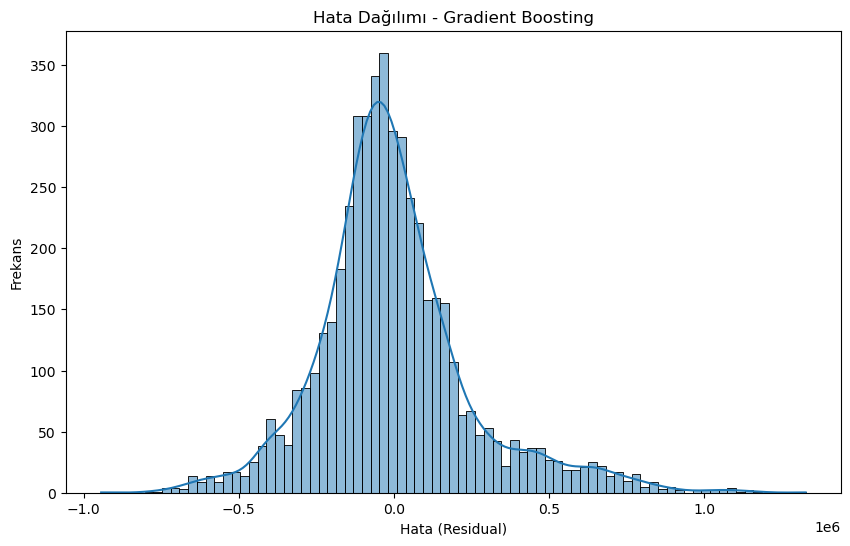

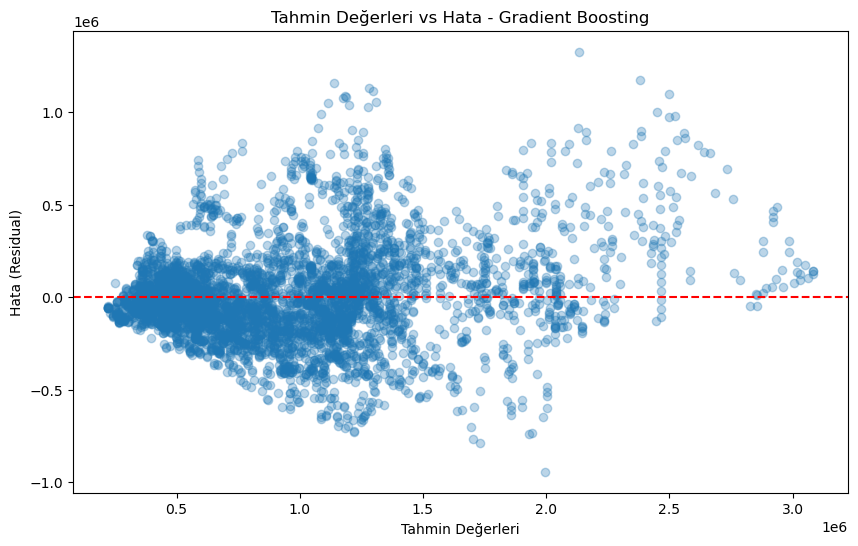

In [32]:
# Modelleri değerlendirelim.
evaluate_model(y_train, gb_pred, 'Gradient Boosting')

<Figure size 1000x600 with 0 Axes>

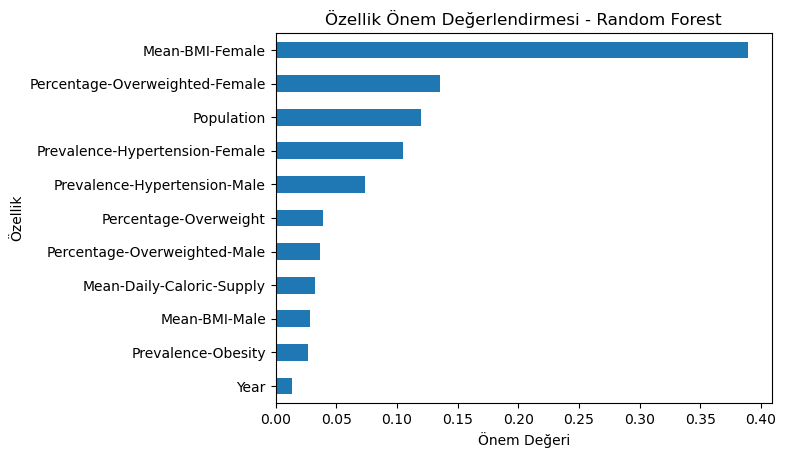

In [33]:
# Özellik Önem Değerlendirmesi için Random Forest Modeli
rf_coefficients = pd.DataFrame(rf_model.feature_importances_, X_train.columns, columns=['Importance'])

plt.figure(figsize=(10, 6))
rf_coefficients.sort_values(by='Importance').plot(kind='barh', legend=False)
plt.xlabel('Önem Değeri')
plt.ylabel('Özellik')
plt.title('Özellik Önem Değerlendirmesi - Random Forest')
plt.show()

<Figure size 1000x600 with 0 Axes>

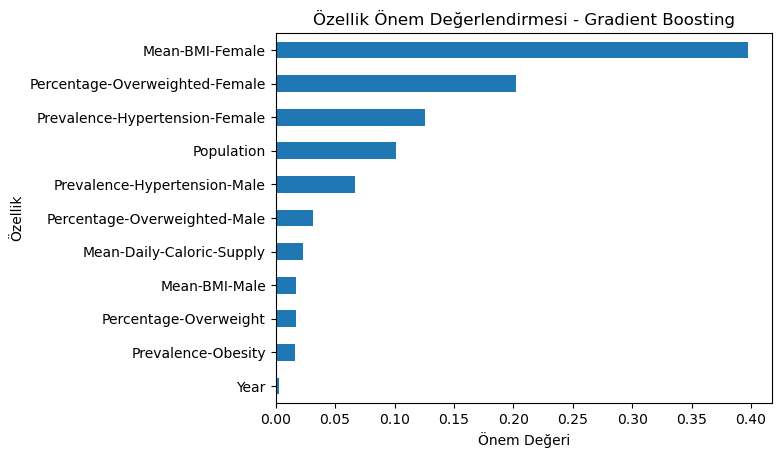

In [34]:
# Özellik Önem Değerlendirmesi için Gradient Boosting Modeli
gb_coefficients = pd.DataFrame(gb_model.feature_importances_, X_train.columns, columns=['Importance'])

plt.figure(figsize=(10, 6))
gb_coefficients.sort_values(by='Importance').plot(kind='barh', legend=False)
plt.xlabel('Önem Değeri')
plt.ylabel('Özellik')
plt.title('Özellik Önem Değerlendirmesi - Gradient Boosting')
plt.show()